# Prédiction des Maladies Cardiaques

Ce cahier Jupyter utilise les librairies de base de Python pour la science des données dans le but de construire
un model d'apprentissage automatique pour prédire si un patient a ou non une maladie cardiaque en se basant sur
ses attributs médicaux.

Plus précisément, nous aborderons les sujets suivants.

* Analyse exploratoire des données (AED) - processus consistant à parcourir un ensemble de données et à en découvrir davantage.
* Formation de modèle - créer un ou plusieurs modèles pour apprendre à prédire une variable cible en fonction d'autres variables.
* Évaluation du modèle - évaluation des prédictions d'un modèle à l'aide de mesures d'évaluation spécifiques au problème.
* Comparaison de modèles - comparaison de plusieurs modèles différents pour trouver le meilleur.
* Ajustement du modèle - une fois que nous avons trouvé un bon modèle, comment pouvons-nous l'améliorer ?
* Importance des caractéristiques - puisque nous prédisons la présence d'une maladie cardiaque, certains éléments sont-ils plus importants pour la prédiction ?
* Validation croisée - si nous construisons un bon modèle, pouvons-nous être sûrs qu'il fonctionnera sur des données inconnues ?
* Rapporter ce que nous avons trouvé - si nous devions présenter notre travail, que montrerions-nous à quelqu'un ?

<img src="images/processus.png"/>

## 1 . Définition du Problème

> Étant donné les paramètres cliniques d'un patient, peut-on prédire s'il a ou non une maladie cardiaque ?

## 2. Data

Les données d'origine provenaient des données Cleavland du référentiel d'apprentissage automatique de l'UCI. https://archive.ics.uci.edu/ml/datasets/heart+Disease

Il existe également une version de celui-ci disponible sur Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Évaluation

> Si nous pouvons atteindre une précision de 95 % pour prédire si un patient a ou non une maladie cardiaque pendant la preuve de concept, nous poursuivrons le projet.

## 4. Caractéristiques

C'est là que l'on obtiendra différentes informations sur chacune des caractéristiques de nos données. On peut le faire en faisant nos propres recherches (par exemple en consultant les liens ci-dessus) ou en parlant à un expert en la matière (quelqu'un qui connaît l'ensemble de données).

**Dictionnaire de données :**

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

## Préparons nos Outils

Nous allons utiliser Pandas, Matplotlib, Numpy et Seaborn pour l'analyse de nos données .


In [1]:
# Importons tous les outils dont nous avons besoin

# Librairies d'analyse et de traçage de données
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Modelisation à partir de Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Évaluation de modèle

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import plot_roc_curve, classification_report

## Importons nos données

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape #(lignes, colonnes)

(303, 14)

## Eploration et Analyse des données

Les questions auxquelles nous essayons de répondre sont les suivantes : 

1. Quelles données avons nous et Comment allons nous traiter les différents types ?
2. Y a t-il des données manquantes et comment y faire face ?
3. Y a t-il des données abbérantes et  pourquoi s'en préocuper ?
4. Comment pouvons-nous ajouter, modifier ou supprimer des caractéristiques pour tirer le meilleur parti de nos données ?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Voyons combien de  patients atteints et non atteints nous avons

df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

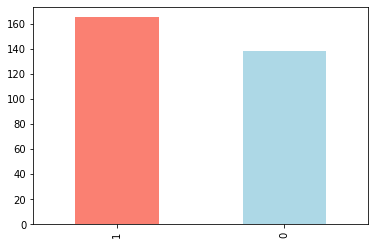

In [5]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Données manquantes ?

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Fréquence des Maladies Cardiaques selon le Sexe

In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


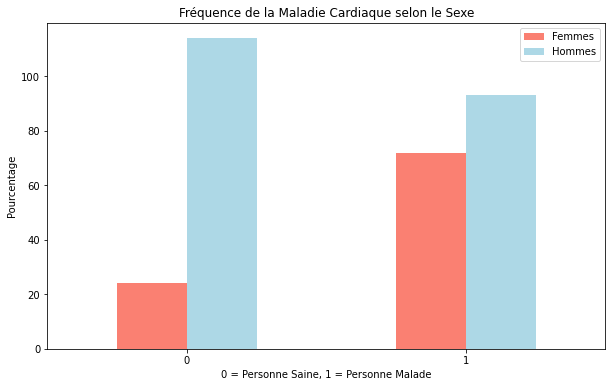

In [11]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

plt.title("Fréquence de la Maladie Cardiaque selon le Sexe")
plt.xlabel("0 = Personne Saine, 1 = Personne Malade")
plt.ylabel("Pourcentage")
plt.legend(["Femmes", "Hommes"])
plt.xticks(rotation=1);


In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

## Âge vs Fréquence Cardiaque Maximale pour les maladies cardiaques

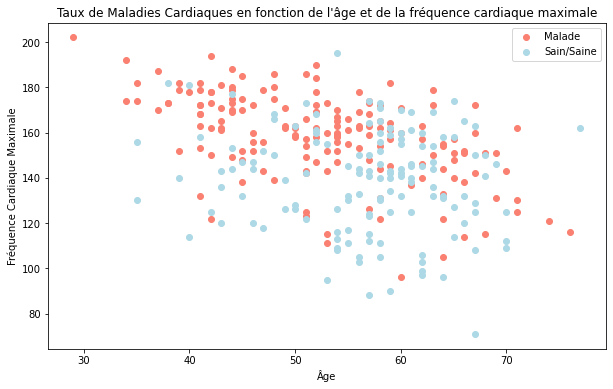

In [14]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c = "salmon");
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c = "lightblue");

plt.title("Taux de Maladies Cardiaques en fonction de l'âge et de la fréquence cardiaque maximale")
plt.xlabel("Âge")
plt.ylabel("Fréquence Cardiaque Maximale")
plt.legend(["Malade", "Sain/Saine"]);

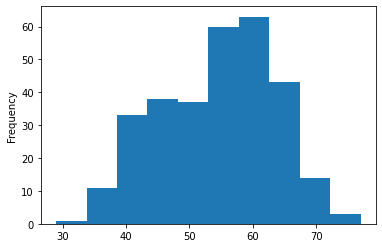

In [15]:
# Vérifions la distribution de l'âge avec un histogramme
df.age.plot.hist();

### Fréquence des Maladies Cardiaques par rapport au type de douleur thoracique

In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


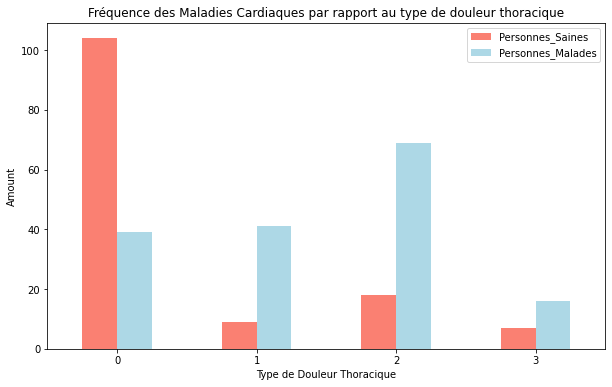

In [17]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])
plt.xlabel("Type de Douleur Thoracique")
plt.ylabel("Amount")
plt.title("Fréquence des Maladies Cardiaques par rapport au type de douleur thoracique")
plt.xticks(rotation=0)
plt.legend(["Personnes_Saines", "Personnes_Malades"]);

In [18]:
# Construisons une matrice de corrélation nous permettant d'observer les dépendances entre les variables
# S'agit il d'une corrélation positive & ou d'une corrélation négative ?

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


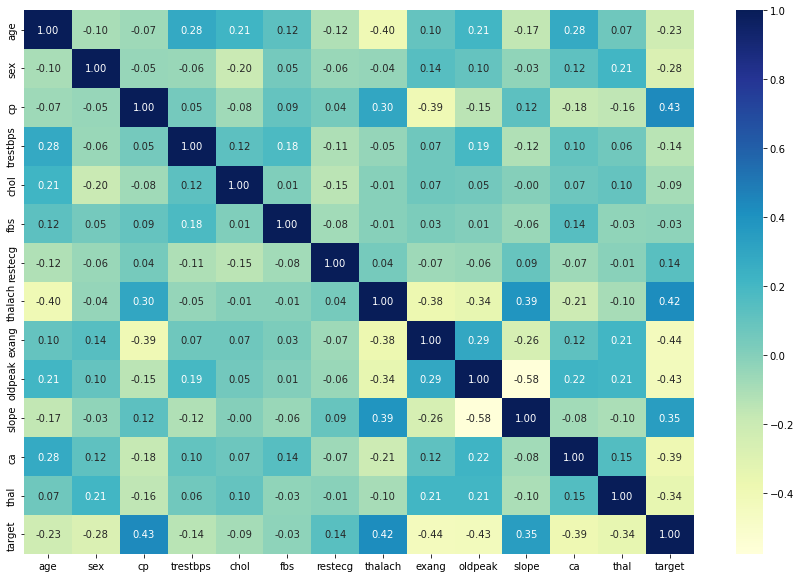

In [19]:
# Rendons notre matrice de corrélation plus significative

matrix_corr = df.corr()

fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(matrix_corr,annot=True, fmt=".2f", cmap="YlGnBu");

## 5. Modelisation

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Divisons nos données

X = df.drop("target", axis=1)
y = df["target"]


In [22]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

On va essayer 3 différents modeles d'apprentissage automatique afin de trouver des modèles dans les données
d'entrainement : 

* Logistic Regression
* K-Nearest Neighbours Classifier
* RandomForestClassifier

In [26]:
# Nos modèles dans un dictionnaire

models = {"Logistic Regression" : LogisticRegression(), "KNN" : KNeighborsClassifier(),
         "Random Forest" : RandomForestClassifier()}

def fit_and_score(models, X_train, y_train, X_test, y_test):
    
    """
        Entrainement et Évaluation des modèles ML.
        models = dictionnaire contennant nos modèles scikit-learn
    """
    
    np.random.seed(42)
    
    models_scores = {}
    
    for name, model in models.items():
        
        model.fit(X_train, y_train)
        
        models_scores[name] = model.score(X_test, y_test)
        
    return models_scores
    

In [27]:
models_score = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
models_score

/home/charlie/Desktop/heart-disease-project/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Comparaison des Modèles

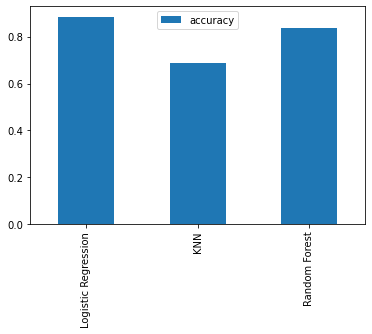

In [28]:
models_compare = pd.DataFrame(models_score, index=["accuracy"])
models_compare.T.plot.bar();

Dans cette phase expérimentale, nous allons procéder comme suit : 

* Réglages des Hyperparamètres
* Matrice de Confusion
* Importance des Caractéristiques
* Cross-Validation (Validation Croisée)
* Precision
* Recall (Rappel)
* F1-Score
* Rapport de Classification (Classification Report)
* Aire sous la Courbe ROC 
* Courbe ROC (ROC Curve)

### Réglages des Hyperparamètres

In [29]:
# Essayons de régler les hyperparamètres de KNN

# Car nous voulons comparer nos différents modèles

train_scores = []
test_scores = []

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    


In [30]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [31]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Score Maximal du KNN sur les données de test : 75.41 %


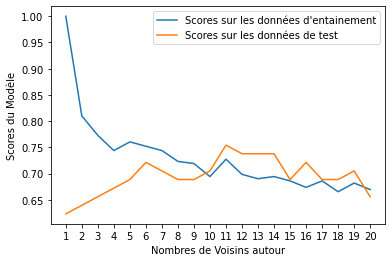

In [32]:
plt.plot(neighbors, train_scores, label="Scores sur les données d'entainement")
plt.plot(neighbors, test_scores, label="Scores sur les données de test ")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Nombres de Voisins autour")
plt.ylabel("Scores du Modèle")
plt.legend()

print(f"Score Maximal du KNN sur les données de test : {max(test_scores) * 100:.2f} %");

## Réglages des Hyperparamètres avec RandomizedSearchCV()

On vas auster les modèles suivants : 

* LogisticRegression()
* RandomForestClassifier()

------ En utilisant RandomizedSearchCV()

In [33]:
# Grille d'hyperparamètres pour le LogisticRegression()

log_reg_grid = {"C" : np.logspace(-4,4,20), #Création d'une grille de nombres sur un espace logarithmique
                "solver" : ["liblinear"]}

# Grille d'hyperparamètres pour le RandomForestClassifier()

rfc_grid = {"n_estimators" : np.arange(10,1000,50), "max_depth" : [None, 3,5,10], 
            "min_samples_split" : np.arange(2,20,2), "min_samples_leaf": np.arange(1,20,2)}

In [34]:
np.random.seed(42)

# Tuning Hyperparameters for LogisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, 
                               n_iter=20, cv=5, verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [35]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [36]:
np.random.seed(42)

rs_rfc = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rfc_grid,
                            n_iter=20, cv=5, verbose=True)

rs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [37]:
rs_rfc.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [38]:
rs_rfc.score(X_test, y_test)

0.8688524590163934

In [39]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [40]:
models_score

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [41]:
## Réglages des Hyperparamètres de LogisticRegression() avec GridSearchCV()

log_reg_grid2 = {"C": np.logspace(-4,4,30), "solver" : ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid2, cv=5, verbose=True, refit=True)

gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [42]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [43]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Évaluation du modèle ML de classification amèlioré avec "accuracy"

* Courbe ROC et score de la zone sous la courbe AUC
* Matrice de Confusion
* Precision
* Classification report
* Rappel (recall)
* F1-score

... et il serait bien d'utiliser la validation croisée tant que possible .

In [44]:
# Faisons nos prédictions

y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [45]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

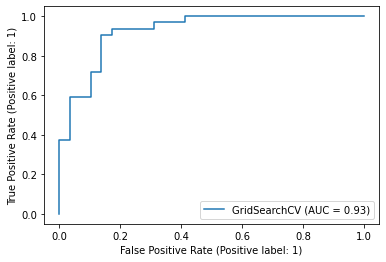

In [46]:
# Passons à la courbe ROC

plot_roc_curve(gs_log_reg, X_test, y_test);

In [47]:
# Matrice de Confusion

print(confusion_matrix(y_test, y_preds));

[[25  4]
 [ 3 29]]


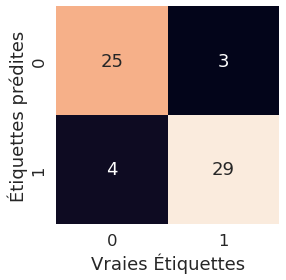

In [48]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_preds, y_test):
    
    """
    Nous allons construire notre matrice de confusion avec seaborn
    """
    
    fig, ax = plt.subplots(figsize=(4,4))
    
    sns.heatmap(confusion_matrix(y_preds, y_test), annot=True, cbar=False)
    
    plt.xlabel("Vraies Étiquettes")
    plt.ylabel("Étiquettes prédites")
    

plot_conf_mat(y_preds, y_test)


In [49]:
# Passons maintenant à un rapport de classification ansi qu'à la validation croisée, le rappel et la F1-score

print(classification_report(y_preds, y_test))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.91      0.88      0.89        33

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



### Nous allons calculer nos métriques en utilisant cette fois ci la validation croisée



In [50]:
# Récupérons nos meilleurs hyperparamètres

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [51]:
model = LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [52]:
# Cross-Validation accuracy

cv_acc = cross_val_score(model, X, y, cv=5, scoring="accuracy")

cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [53]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [54]:
# Cross-validation preecision

cv_precision = cross_val_score(model, X, y, cv=5, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [55]:
# Cross-Validation recall

cv_recall = cross_val_score(model, X, y, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [56]:
# Cross-Validation f1-score

cv_fs = cross_val_score(model, X, y, scoring="f1")
cv_fs = np.mean(cv_fs)
cv_fs

0.8673007976269721

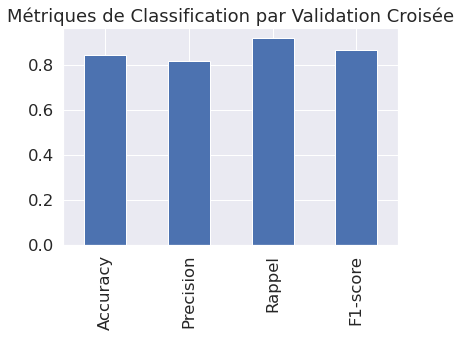

In [57]:
# Visualisation de nos métriques sur un seul graphiques

cv_metrics = pd.DataFrame({
    "Accuracy" : cv_acc,
    "Precision" : cv_precision,
    "Rappel" : cv_recall,
    "F1-score" : cv_fs
}, index=[0])

cv_metrics.T.plot.bar(title="Métriques de Classification par Validation Croisée", legend=False);

## Importance de Caractéristiques

Cette section nous permettra de répondre à la question suivante : Quelle(s) caractérisque(s) a/ont le plus 
contribuée(s) aux résultats du modèle ? Et l'on peu même étendre notre réflexion afin de savoir Comment ? 

In [58]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [59]:
# Tout d'abord ajustons une instance de régression logistique 


clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [60]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
# Nous allons utiliser un attribut du modèle de régression logistique appelé coef_
# Un coefficient de régression décrit la taille et la direction de la relation entre 
# un prédicteur et la variable de réponse.
clf.coef_

array([[ 0.00316727, -0.86044576,  0.66067074, -0.01156993, -0.00166374,
         0.04386132,  0.31275782,  0.02459361, -0.60413035, -0.56862855,
         0.45051615, -0.63609861, -0.67663376]])

In [62]:
# Faisons correspondre les colones aux valeurs de l'attribut coef

caract_dict = dict(zip(df.columns, list(clf.coef_[0])))
caract_dict

# Qu'il s'agisse d'une corrélation positive ou négative, on se pose la question quelle est la contribution
# de chaque carcactéristiques à la prédiction de la variable cible

{'age': 0.0031672715846030935,
 'sex': -0.8604457571727641,
 'cp': 0.6606707429832999,
 'trestbps': -0.011569931252544003,
 'chol': -0.0016637408611369841,
 'fbs': 0.04386132427617729,
 'restecg': 0.3127578230667477,
 'thalach': 0.024593607391386427,
 'exang': -0.6041303464142003,
 'oldpeak': -0.5686285482723883,
 'slope': 0.4505161474321694,
 'ca': -0.6360986111170053,
 'thal': -0.6766337550845071}

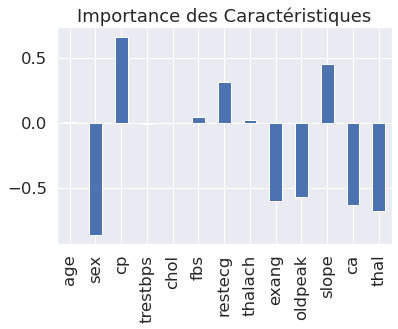

In [63]:
# Visualisons l'importance des caractéristiques
feature_df = pd.DataFrame(caract_dict, index=[0])
feature_df.T.plot.bar(title="Importance des Caractéristiques", legend=False);

In [64]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## Expérimentation

Lorsque nous n'atteignons pas la métrique d'évaluation, il est important de se poser les questions suivantes : 

* Pouvons nous collecter plus de données ?
* Pouvons nous essayer un meilleur modèle ? Comme CatBoost ou XgBoost ?
* Pouvons nous encore améliorer notre modèle ? Au delà de tout ce qu'on a déjà essayé ?
* Si toutefois nous atteignons le score fixé au préalable, comment exporter notre modèle afin de le partager ?
